# Practice of MRI images

In [ ]:
#Loading Data

In [1]:
#pip install opencv-python

In [2]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import random
import cv2
import sys

In [3]:
tumor = []
healthy = []
for f in glob.iglob("./data/brain_tumor_dataset/yes/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    tumor.append(img)

for f in glob.iglob("./data/brain_tumor_dataset/no/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128)) 
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    healthy.append(img)

In [4]:
healthy = np.array(healthy)
tumor = np.array(tumor)
All = np.concatenate((healthy, tumor))


In [5]:
healthy.shape

(0,)

In [38]:
tumor.shape

(86, 128, 128, 3)

In [39]:
def plot_random(healthy, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]
    
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_imgs[i])
        
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('tumor')
        plt.imshow(tumor_imgs[i])

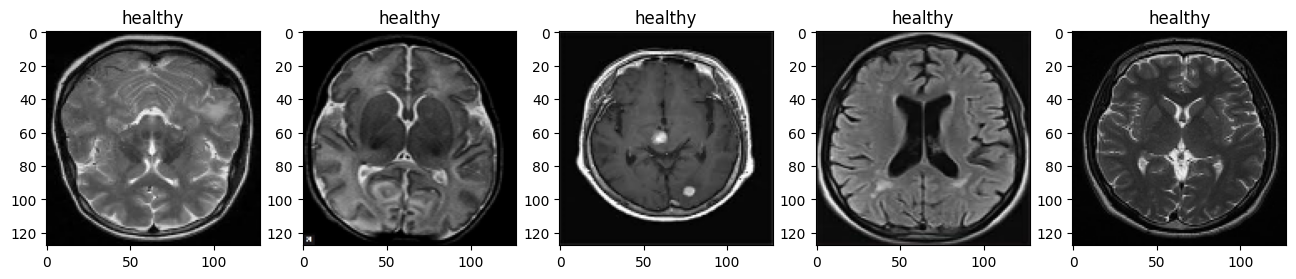

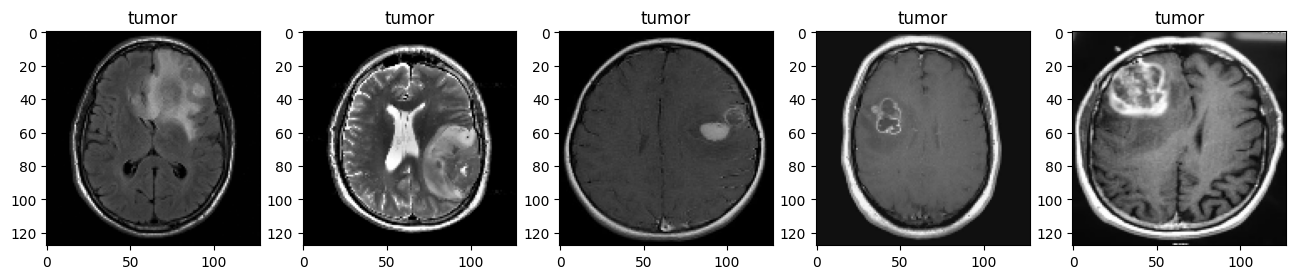

In [40]:
plot_random(healthy, tumor, num=5)

In [3]:
# Tried to 'slice', but only works on 3D images

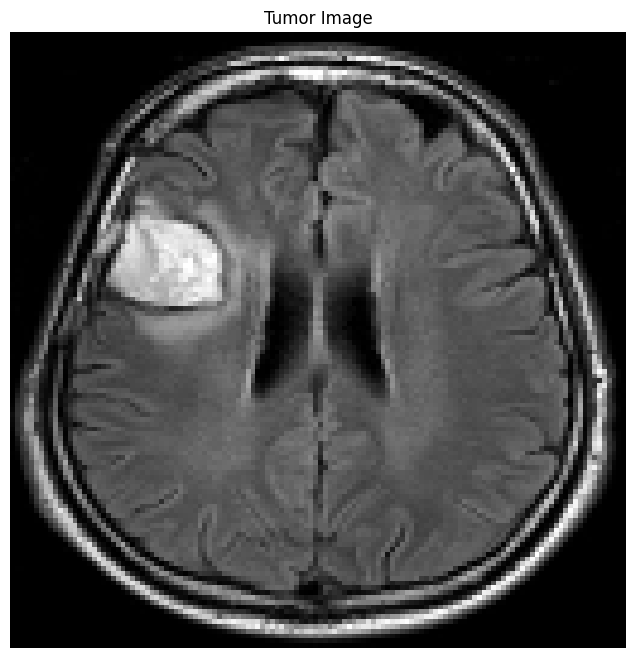

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def plot_single_tumor(tumor):
    # Select a random tumor image
    selected_tumor_img = tumor[np.random.choice(tumor.shape[0], 1, replace=False)[0]]

    # Plot the tumor image
    plt.figure(figsize=(8, 8))
    plt.imshow(selected_tumor_img, cmap='gray')  
    plt.title('Tumor Image')
    plt.axis('off')  
    plt.show()

plot_single_tumor(tumor)


In [63]:
#!pip install monai

(86, 128, 128, 3)
<class 'numpy.ndarray'>
uint8
[74 74 74]


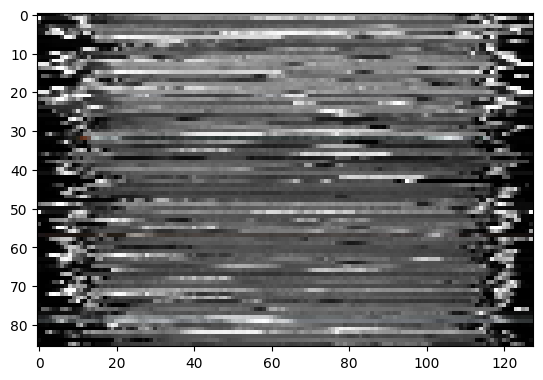

In [83]:
image = tumor
print(image.shape)
print(type(image))

# check other attributes of the neuroimage
print(image.dtype)  # data type of image entries
min_value = np.min(image) # minimum value 
max_value = np.max(image) # maximum value
mean_value = np.mean(image) # mean value
std = np.std(image)  # standard deviation if useful
print(image[70, 80, 90]) # check a random value in the modality
plt.imshow(image[:, :, 80], cmap = 'gray') # show a slice

In [86]:
pip install scikit-image


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 24.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 KB 25.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


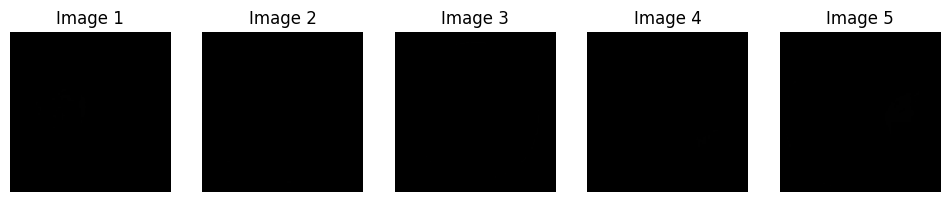

In [92]:
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt

for i in range(image.shape[0]):
    for c in range(image.shape[3]):
        image[i, :, :, c] = exposure.equalize_adapthist(image[i, :, :, c])

# Display a few preprocessed images
plt.figure(figsize=(12, 6))
for i in range(5):  # Display the first 5 images for illustration
    plt.subplot(1, 5, i + 1)
    plt.imshow(image[i])
    plt.title(f'Image {i + 1}')
    plt.axis('off')

plt.show()


In [ ]:
#Using image with a tumor

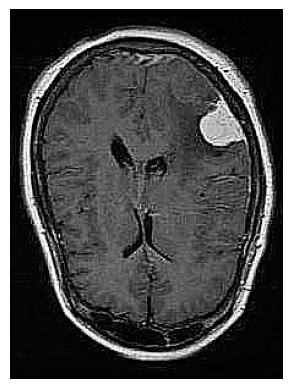

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'y1001.jpg'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


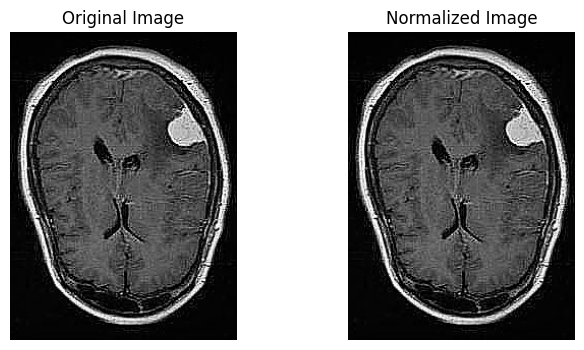

In [17]:

image_path = 'y1001.jpg'
image = Image.open(image_path)


image_array = np.array(image)

# Normalize pixel values to the range [0, 1]
normalized_image = image_array / 255.0

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.axis('off')

plt.show()


In [ ]:
#Cropping the image

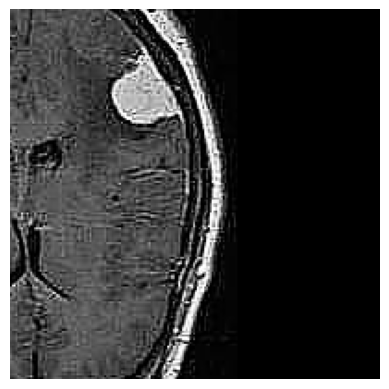

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the bounding box coordinates (left, top, right, bottom)
bbox = (100, 50, 300, 250)  #coordinates based on the tumor location

cropped_image = image.crop(bbox)

plt.imshow(cropped_image)
plt.axis('off')
plt.show()


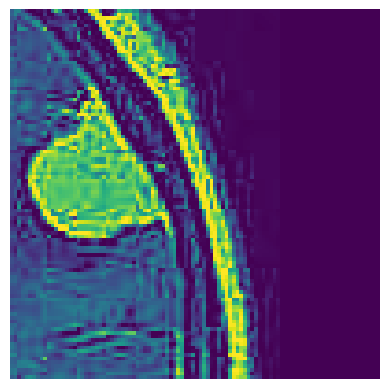

In [34]:

#(left, top, right, bottom)
bbox = (150, 50, 250, 150)  #coordinates based on the tumor location

cropped_image = image.crop(bbox)
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

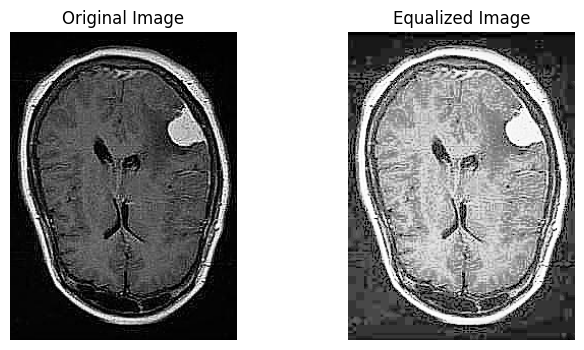

In [24]:
image_path = 'y1001.jpg'
image = Image.open(image_path).convert('L')  

equalized_image = ImageOps.equalize(image)
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()


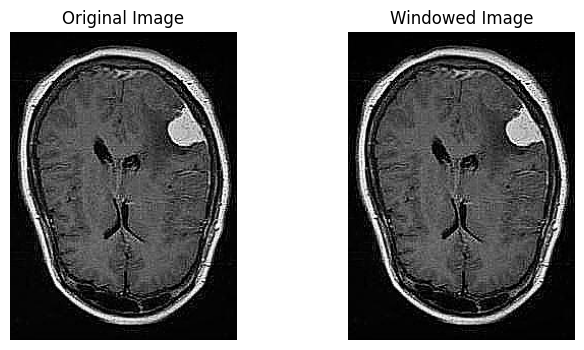

In [27]:

# Define window and level parameters
window_width = 300
window_center = 150
min_intensity = window_center - window_width // 2
max_intensity = window_center + window_width // 2

windowed_image = np.clip(np.array(image), min_intensity, max_intensity)

windowed_image = ((windowed_image - min_intensity) / (max_intensity - min_intensity) * 255).astype(np.uint8)
windowed_image = Image.fromarray(windowed_image)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(windowed_image, cmap='gray')
plt.title('Windowed Image')
plt.axis('off')

plt.show()


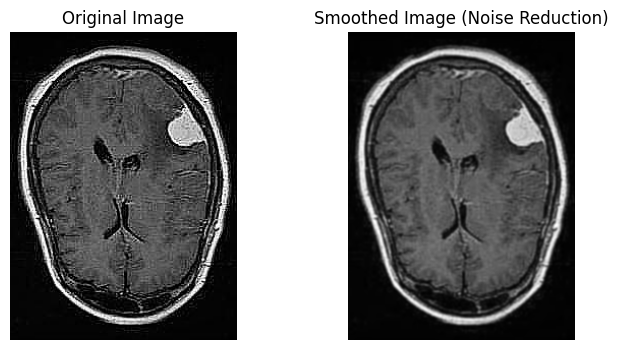

In [31]:
image_array = np.array(image)

#noise reduction
smoothed_image = filters.gaussian(image_array, sigma=1)
smoothed_image = Image.fromarray((smoothed_image * 255).astype(np.uint8))

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Noise Reduction)')
plt.axis('off')

plt.show()
